Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe named "data" from the given datafile and print it's head

In [21]:
data = pd.read_csv("datasets_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [26]:
print(data.dtypes)
print()
print(data.ndim)
print()
print(data.describe())
print()
print(data.info())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

2

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   chil

Check if there are missing values. If yes, handle them.

In [25]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

<Axes: >

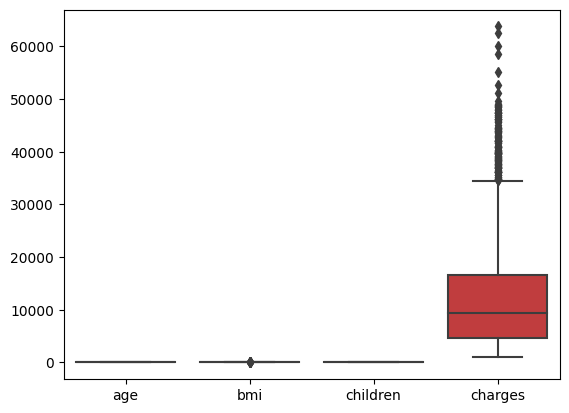

In [24]:
sns.boxplot(data)

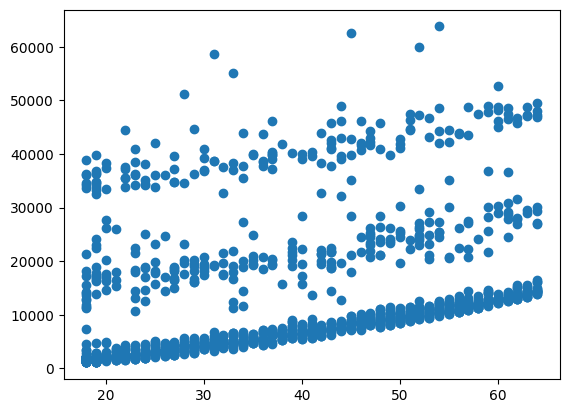

In [23]:
plt.scatter(data['age'],data['charges'])

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

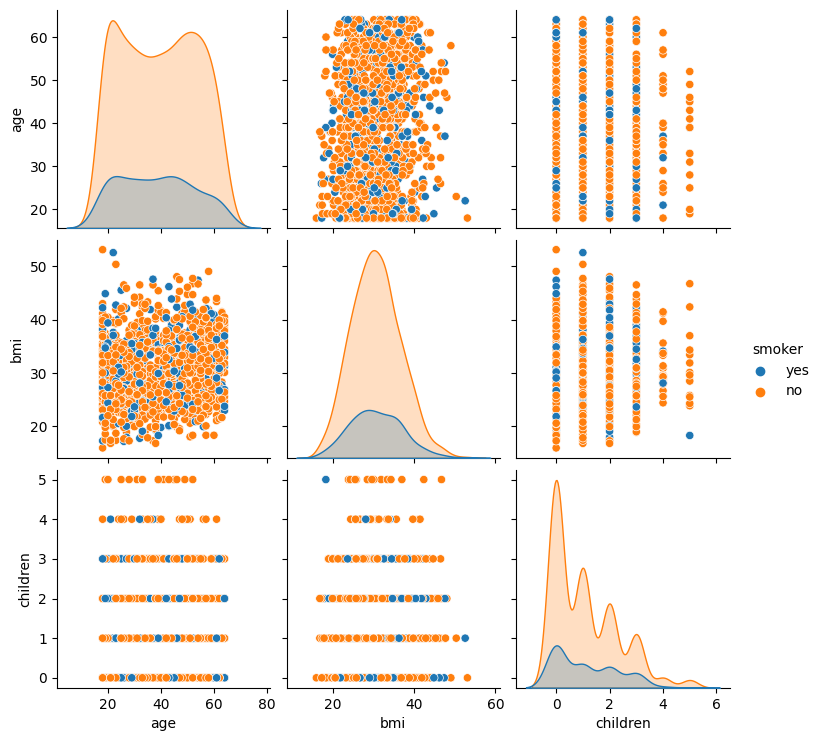

In [22]:
sns.pairplot(data, kind="scatter", vars=['age', 'bmi', 'children'], hue='smoker', diag_kind='kde')
plt.show()

Create X and Y

Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

In [55]:
df = data
df
df['sex'].replace({'female':0,'male':1},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,4,2007.94500


In [56]:
from scipy.stats import skew
#finding the skewness in each variable
df_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
df_num_skewed = df_num_skew[(df_num_skew > .75) | (df_num_skew < -.75)]
 
print(df_num_skew)
print(df_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[df_num_skewed.index] = np.log1p(X[df_num_skewed.index])

# why we are using log1p ?
# to avoid the - infinte wala problem that could have rrived die to the log(o)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [49]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,4,16884.92400
1,18,male,33.770,1,0,3,1725.55230
2,28,male,33.000,3,0,3,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520


Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3<br><br>
Hint: df.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [54]:
data['sex'].replace({'female':0,'male':1},inplace=True)
data['smoker'].replace({'no':0,'yes':1},inplace=True)
data['region'].replace({'northeast':0,'northwest':1,'southeast':3,'southwest':4},inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

(1338, 6)
(1338,)


C:\Users\KAIF\AppData\Local\Temp\ipykernel_16704\53851118.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<function matplotlib.pyplot.show(close=None, block=None)>

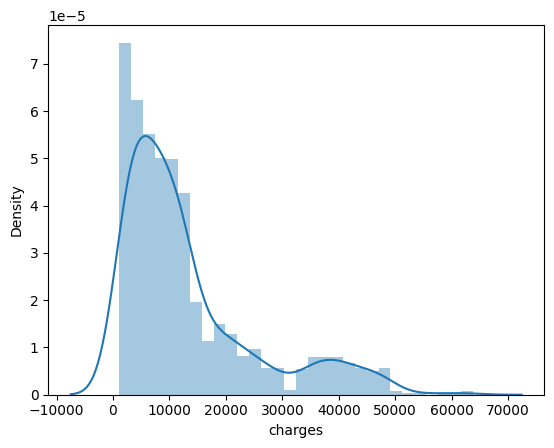

In [57]:
X = data[['age','sex','bmi','children','smoker','region']]
Y = data['charges']
data.shape
print(X.shape)
print(Y.shape)
sns.distplot(Y)
plt.show

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

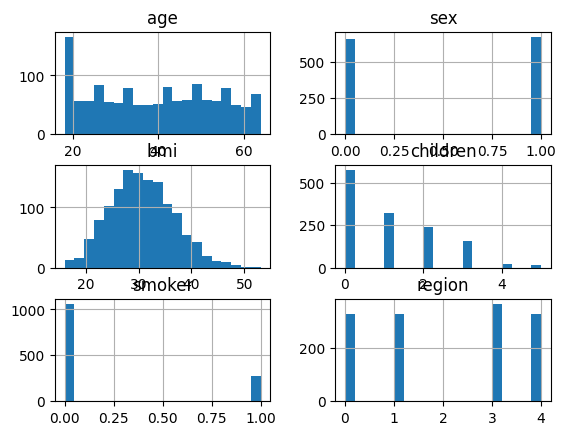

In [58]:
X.hist(bins=20)
plt.show()

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.000935
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.006952
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.186092
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.011128
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.007807
region    0.000935  0.006952  0.186092  0.011128  0.007807  1.000000


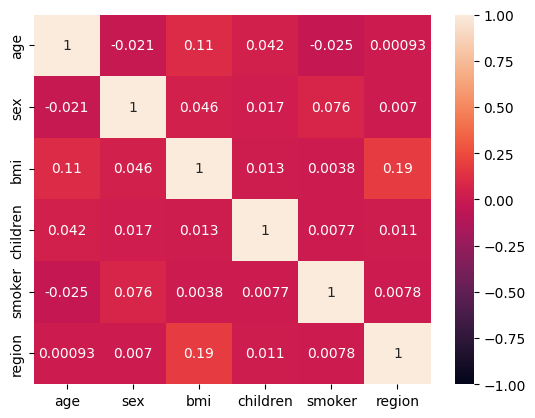

In [59]:
corr_df = X.corr(method='pearson')
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.38
3,children,1.80
4,smoker,1.26
5,region,2.76


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=10,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


Build a base Linear Regression model using sklearn.

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
print(lr.coef_)
print(lr.intercept_)

[  259.68931266  -261.85074144   346.64607341   543.75583122
 24088.35419224  -193.11328349]
-12563.723388272423


In [68]:
print(list(zip(X.columns,lr.coef_)))

[('age', 259.68931266023685), ('sex', -261.8507414425125), ('bmi', 346.6460734144216), ('children', 543.7558312189645), ('smoker', 24088.354192235733), ('region', -193.1132834942669)]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [80]:
lr.score(X_train,Y_train)

0.7634690731980112

In [84]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(Y_test,Y_pred)
print("R-Squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-Squared: 0.695783386010433
RMSE: 6531.966961493664
Adj R-square: 0.6944120113418099


Predict using the model.

In [71]:
Y_pred = lr.predict(X_test)
Y_pred

array([ 8098.89746684,  5911.55826775, 15127.96733816, 11391.86835475,
        3797.35068636,  9593.44279448,  9426.85029031, 25986.81364835,
        7683.35102121, 30727.30345238,  1755.14405869,  4166.40596413,
        7364.26360565, 11207.85648851, 12893.17994695, 11156.16046236,
        5675.42544433, 18190.18064945, 10635.1981836 , 30870.10735695,
       34100.22005233,  4361.86974929,  1232.67566151,  7299.53151568,
        4405.33658439, 13432.18717673, 11776.38347947, 10340.14490175,
        6358.55298013, 30972.04983114, -1800.33806954, 33942.32817626,
        9562.8345048 ,  7361.2781248 ,  8168.23001693, 12057.21518857,
       13488.36509563, 12627.72788895,  9904.97881336,  8413.91656735,
       15991.27126416,  9845.9675344 ,  5549.31312103, 11508.25512694,
        5530.51310796,  7382.83792618,  6575.71754536, 34211.07551494,
       11058.25333058, 10677.23662029, 32860.36046483,  5605.68900648,
       10313.7203113 , 14617.77969487, 11225.97399234, 13379.75062977,
      

Evaluate the model.

In [78]:
new_df = pd.DataFrame()
new_df = X_test.copy()
new_df['Actual Sales']=Y_test
new_df['Predicted Sales']=Y_pred
new_df = new_df.reset_index().drop('index',axis=1)
new_df

,age,sex,bmi,children,smoker,region,Actual Sales,Predicted Sales
0,37,0,27.740,3,0,1,7281.50560,8098.897467
1,36,0,26.885,0,0,1,5267.81815,5911.558268
2,59,1,37.100,1,0,4,12347.17200,15127.967338
3,61,0,25.080,0,0,3,24513.09126,11391.868355
4,29,0,26.030,0,0,1,3736.46470,3797.350686
...,...,...,...,...,...,...,...,...
263,50,1,34.200,2,1,4,42856.83800,36417.599935
264,26,0,40.185,0,0,1,3201.24515,7925.057918
265,19,1,27.265,2,0,1,22493.65964,2454.226381
266,57,1,40.945,0,0,0,11566.30055,16170.140168


In [ ]:
new_df['Actual Sales'].plot(color="blue")
new_df['Predicted Sales'].plot(color="orange")
plt.show(

Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [81]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(X_train,Y_train)


Ridge()

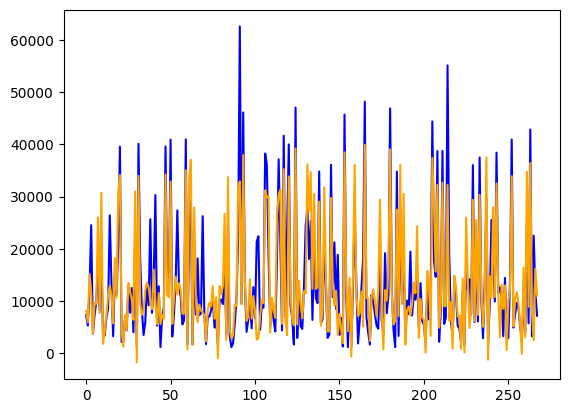

Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

Predict using the model. Evaluate the model.

Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

Check for Assumption 8-Errors should follow constant variance.<br>
Hint: Diagnostic plot

Write down your conclusion as to which is the final model that you would go with along with the reasons.

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

Save the predicted values along with the observations into an excel file.